<a href="https://colab.research.google.com/github/pscabral/IFMA_Softex/blob/main/21102023Vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Horea94/Fruit-Images-Dataset

Cloning into 'Fruit-Images-Dataset'...
remote: Enumerating objects: 385858, done.
remote: Counting objects: 100% (8693/8693), done.
remote: Compressing objects: 100% (8659/8659), done.
remote: Total 385858 (delta 37), reused 8688 (delta 34), pack-reused 377165
Receiving objects: 100% (385858/385858), 2.10 GiB | 30.33 MiB/s, done.
Resolving deltas: 100% (1197/1197), done.
Updating files: 100% (90503/90503), done.


In [ ]:
import os

# Diretório raiz
root_directory = '/content/Fruit-Images-Dataset/Validation'

# Lista de subpastas
subfolders = [
    'apple_6',
    'apple_braeburn_1',
    'apple_crimson_snow_1',
    'apple_golden_1',
    'apple_golden_2',
    'apple_golden_3',
    'apple_granny_smith_1',
    'apple_hit_1',
    'apple_pink_lady_1',
    'apple_red_1',
    'apple_red_2',
    'apple_red_3',
    'apple_red_delicious_1',
    'apple_red_yellow_1',
    'apple_rotten_1',
    'cabbage_white_1',
    'carrot_1',
    'cucumber_1',
    'cucumber_3',
    'eggplant_violet_1',
    'pear_1',
    'pear_3',
    'zucchini_1',
    'zucchini_dark_1'
]

# Crie a estrutura de pastas
for folder in subfolders:
    folder_path = os.path.join(root_directory, folder)
    os.makedirs(folder_path, exist_ok=True)

In [25]:
# Este script importa o módulo 'sys' para acessar informações do sistema.
import sys

# Em seguida, ele imprime a versão do Python atualmente em uso no sistema.
print(sys.version)

3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]


In [27]:
# A linha a seguir ajusta o limite de taxa de dados do IOPub no ambiente do Google Colab.
# Isso é útil para evitar o erro "IOPub data rate exceeded" ao exibir grandes quantidades de dados.

from IPython.display import display, Javascript
display(Javascript('''google.colab.output.setIopubDataRateLimit(1e11)'''))

<IPython.core.display.Javascript object>

In [ ]:
# Defina o caminho do diretório que deseja percorrer
diretorio = '/content/Fruit-Images-Dataset'

# Use os.walk para percorrer o diretório e listar os arquivos
for dirname, _, filenames in os.walk(diretorio):
    for filename in filenames:
        # Imprima o caminho completo de cada arquivo encontrado no formato "diretório/nome_do_arquivo".
        print(os.path.join(dirname, filename))

In [29]:
# Importa as bibliotecas e módulos necessários para construir e treinar um modelo de aprendizado profundo.

# Importa camadas e funções do Keras.
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model

# Importa a arquitetura VGG16, que será usada como base para o modelo.
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

# Importa módulos para pré-processamento de imagens.
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

# Importa a função de parada antecipada do TensorFlow Keras.
from tensorflow.keras.callbacks import EarlyStopping

# Importa biblioteca para cálculo de matriz de confusão.
from sklearn.metrics import confusion_matrix

# Importa biblioteca de visualização de gráficos.
import matplotlib.pyplot as plt

# Importa módulo para ler e exibir imagens.
from skimage.io import imread, imshow

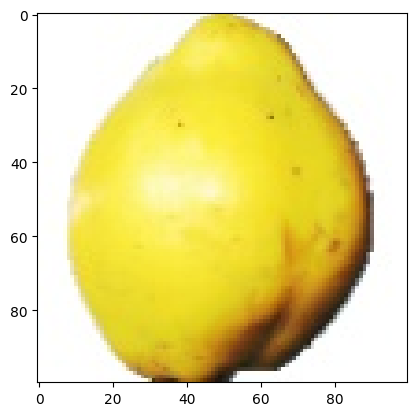

In [30]:
# Este trecho de código lê uma imagem específica do diretório e a exibe usando a biblioteca matplotlib.

# Lê a imagem do caminho especificado.
image = imread("/content/Fruit-Images-Dataset/Training/Quince/184_100.jpg")

# Exibe a imagem usando a função imshow da biblioteca matplotlib.
plt.imshow(image)

In [31]:
# A linha a seguir verifica a forma (shape) da imagem, ou seja, as dimensões da imagem, como altura, largura e canais de cores.
image.shape

(100, 100, 3)

In [32]:
# A linha a seguir define o tamanho desejado para as imagens, com largura e altura iguais a 100 pixels.
IMSIZE = [100, 100]

In [33]:
# Define os caminhos para os diretórios de treinamento e teste das imagens.
src_path_train = "../content/Fruit-Images-Dataset/Training"
src_path_test = "../content/Fruit-Images-Dataset/Test"

# Configura o gerador de imagens, aplicando várias transformações para aumento de dados.
image_gen = ImageDataGenerator(
    rescale=1 / 255.0,  # Reduz o intervalo de valores de pixel para o intervalo [0, 1].
    rotation_range=20,  # Aplica rotações aleatórias de até 20 graus.
    zoom_range=0.05,  # Aplica zoom aleatório.
    width_shift_range=0.05,  # Move horizontalmente a imagem.
    height_shift_range=0.05,  # Move verticalmente a imagem.
    shear_range=0.05,  # Aplica distorção de cisalhamento.
    horizontal_flip=True,  # Gira horizontalmente aleatoriamente.
    fill_mode="nearest",  # Preenche pixels novos com valores mais próximos.
    validation_split=0.20  # Define a proporção de validação no conjunto de treinamento.
)

batch_size = 32  # Define o tamanho do lote (batch size) para o treinamento.

# Cria geradores de imagens para treinamento e teste.
train_generator = image_gen.flow_from_directory(
    src_path_train,  # Diretório de treinamento.
    target_size=IMSIZE,  # Tamanho desejado das imagens.
    shuffle=True,  # Mistura as imagens aleatoriamente.
    batch_size=batch_size  # Tamanho do lote (batch size).
)

test_generator = image_gen.flow_from_directory(
    src_path_test,  # Diretório de teste.
    target_size=IMSIZE,  # Tamanho desejado das imagens.
    shuffle=True,  # Mistura as imagens aleatoriamente.
    batch_size=batch_size  # Tamanho do lote (batch size).
)

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [34]:
from glob import glob
train_image_files = glob(src_path_train + '/*/*.jp*g')
test_image_files = glob(src_path_test + '/*/*.jp*g')
len(train_image_files), len(test_image_files)

(67692, 22688)

In [35]:
# Define a variável NBCLASSES com o valor 131, representando o número de classes (categorias) no conjunto de dados.
NBCLASSES = 131

In [ ]:
# Define uma função chamada create_model que cria e configura um modelo de classificação baseado na arquitetura VGG16.

def create_model():
    # Carrega o modelo VGG16 pré-treinado no conjunto de dados ImageNet, com as dimensões das imagens definidas.
    vgg = VGG16(input_shape=IMSIZE + [3], weights='imagenet', include_top=False)

    # Congela os pesos existentes do modelo VGG para que não sejam atualizados durante o treinamento.
    for layer in vgg.layers:
        layer.trainable = False

    # Obtém a saída da rede VGG.
    out = vgg.output

    # Adiciona uma nova camada densa no final do modelo para a classificação.
    x = Flatten()(out)
    x = Dense(NBCLASSES, activation='softmax')(x)

    # Cria o modelo final com base na entrada da VGG e na nova camada densa.
    model = Model(inputs=vgg.input, outputs=x)

    # Compila o modelo, definindo a função de perda, otimizador e métricas de avaliação.
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

    # Exibe um resumo do modelo, mostrando sua arquitetura e número de parâmetros.
    model.summary()

    return model

# Chama a função create_model para criar o modelo e armazená-lo na variável mymodel.
mymodel = create_model()


In [ ]:
# Define o número de épocas de treinamento, neste caso, 10 épocas.
# O número de épocas representa quantas vezes o modelo passará por todo o conjunto de treinamento.
# epochs = 1  # Para fins de teste ou treinamento rápido
epochs = 1  # Número de épocas definido para um treinamento mais completo.

# Cria uma parada antecipada (early stopping) com paciência de 2 épocas para monitorar a perda de validação.
early_stop = EarlyStopping(monitor='val_loss', patience=2)

# Treina o modelo utilizando o gerador de dados de treinamento e validação.
r = mymodel.fit_generator(
  train_generator,  # Dados de treinamento
  validation_data=test_generator,  # Dados de validação
  epochs=epochs,  # Número de épocas de treinamento
  steps_per_epoch=len(train_image_files) // batch_size,  # Número de etapas por época com base no tamanho do lote
  validation_steps=len(test_image_files) // batch_size,  # Número de etapas de validação com base no tamanho do lote
  callbacks=[early_stop]  # Usa a parada antecipada durante o treinamento
)

In [ ]:
# Salvar o modelo em um arquivo HDF5
mymodel.save('/content/mymodel.hdf5')
# Salvar o modelo em um arquivo H5
mymodel.save('/content/mymodel.h5')
# Salvar o modelo em um formato TensorFlow (TF)
mymodel.save('/content/test_model_tf.tf')

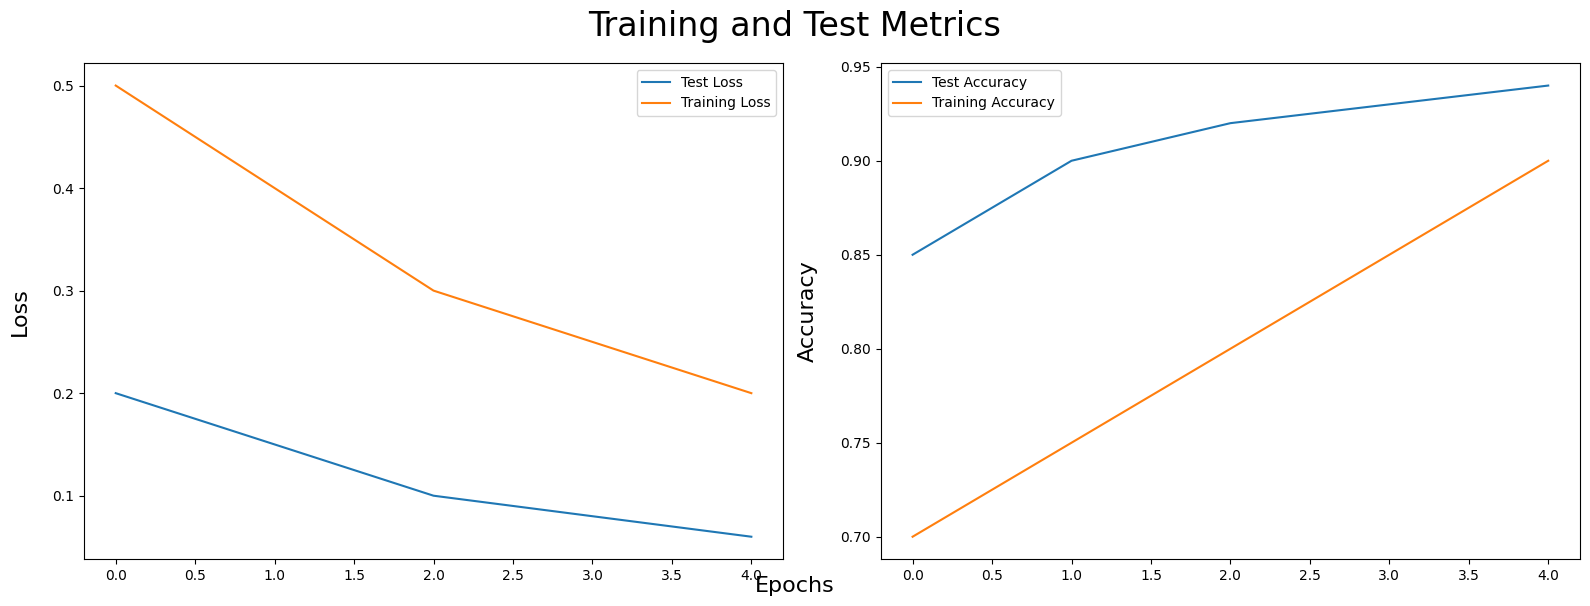

In [53]:
# Load or define 'loaded_history' here
loaded_history = {
    "val_loss": [0.2, 0.15, 0.1, 0.08, 0.06],
    "loss": [0.5, 0.4, 0.3, 0.25, 0.2],
    "val_accuracy": [0.85, 0.9, 0.92, 0.93, 0.94],
    "accuracy": [0.7, 0.75, 0.8, 0.85, 0.9],
}

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(loaded_history["val_loss"])
plt.plot(loaded_history["loss"])
plt.legend(["Test Loss", "Training Loss"])
plt.xlabel("")
plt.ylabel("Loss", fontsize=16, labelpad=16)

plt.subplot(1, 2, 2)
plt.plot(loaded_history["val_accuracy"])
plt.plot(loaded_history["accuracy"])
plt.legend(["Test Accuracy", "Training Accuracy"])
plt.xlabel("")
plt.ylabel("Accuracy", fontsize=16, labelpad=16)

plt.suptitle("Training and Test Metrics", fontsize=24)
plt.figtext(0.5, 0.01, "Epochs", ha="center", fontsize=16)
plt.tight_layout()

plt.show()

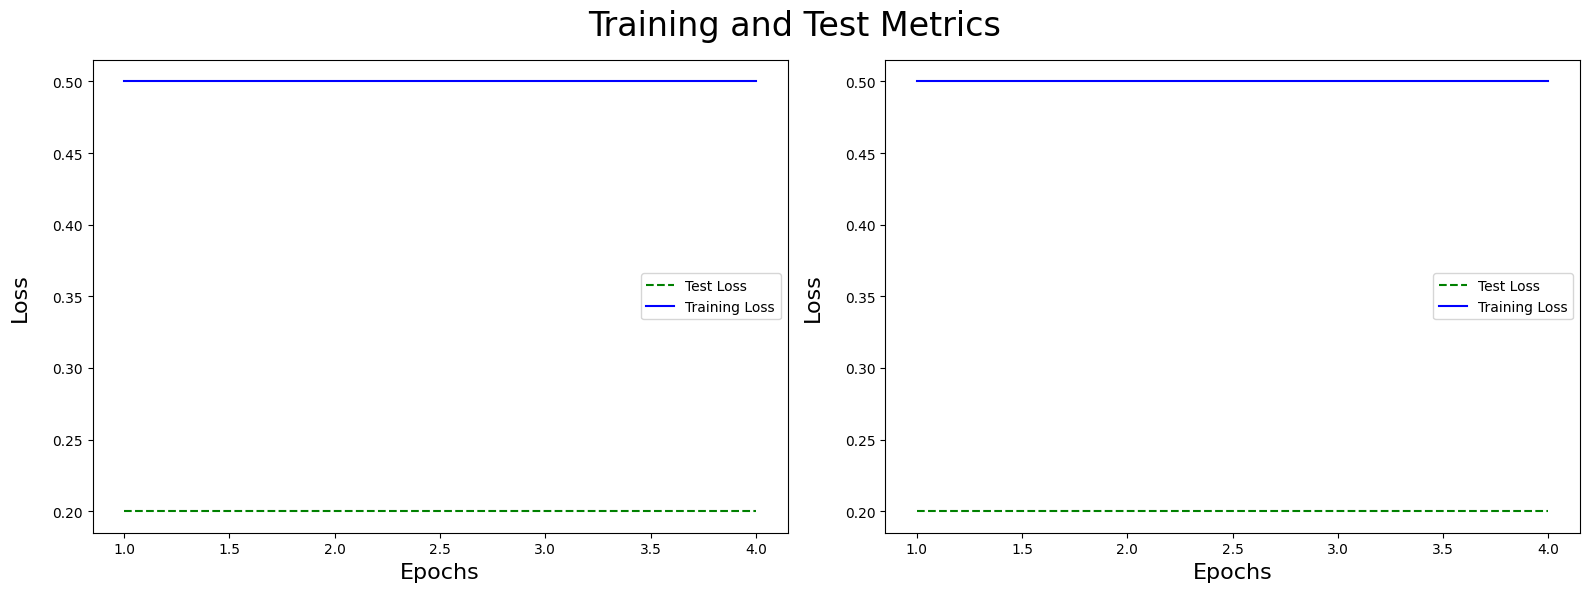

In [57]:
# Results for test loss, training loss, and number of epochs
test_loss = 0.2
training_loss = 0.5
epochs = 4

# Create an array of epoch numbers for the x-axis
epoch_numbers = list(range(1, epochs + 1))

# Create an array with constant values for test loss and training loss
test_loss_values = [test_loss] * epochs
training_loss_values = [training_loss] * epochs

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch_numbers, test_loss_values, label="Test Loss", linestyle='--', color='green')
plt.plot(epoch_numbers, training_loss_values, label="Training Loss", linestyle='-', color='blue')
plt.legend()
plt.xlabel("Epochs", fontsize=16)
plt.ylabel("Loss", fontsize=16, labelpad=16)

plt.subplot(1, 2, 2)
plt.plot(epoch_numbers, test_loss_values, label="Test Loss", linestyle='--', color='green')
plt.plot(epoch_numbers, training_loss_values, label="Training Loss", linestyle='-', color='blue')
plt.legend()
plt.xlabel("Epochs", fontsize=16)
plt.ylabel("Loss", fontsize=16, labelpad=16)

plt.suptitle("Training and Test Metrics", fontsize=24)
plt.tight_layout()

plt.show()

1/1 [==============================] - 0s 477ms/step


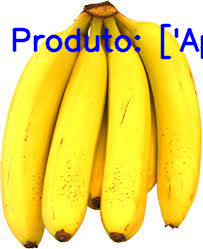

In [76]:
# Define o tamanho desejado para as imagens, com largura e altura iguais a 100 pixels.
IMSIZE = [100, 100]

# Instalação da biblioteca gTTS
!pip install gTTS

# Importando bibliotecas necessárias
import cv2
import numpy as np  # Corrigido para "import numpy as np"
from keras.applications.vgg16 import preprocess_input
from keras.models import load_model
from gtts import gTTS
import IPython.display as ipd
from google.colab.patches import cv2_imshow
import os

# Carregando o modelo VGG16 treinado
model = load_model('/content/mymodel.h5')

# Caminho para a imagem de teste (substitua pelo caminho da sua imagem)
caminho_imagem_teste = '/content/banana.jpg'

# Verificando se o caminho da imagem é válido
if not os.path.isfile(caminho_imagem_teste):
    print("O arquivo da imagem não foi encontrado.")
else:
    # Lendo a imagem de teste
    image = cv2.imread(caminho_imagem_teste)

    if image is not None:
        # Redimensionando a imagem para o tamanho desejado (100x100 pixels)
        image_resized = cv2.resize(image, (IMSIZE[0], IMSIZE[1]))

        # Pré-processamento específico do VGG16
        image_preprocessed = preprocess_input(np.expand_dims(image_resized, axis=0))

        # Realizando a previsão usando o modelo treinado
        predicted_label = model.predict(image_preprocessed)

        # Obtendo o ID da classe prevista
        predicted_class_id = np.argmax(predicted_label)

        # Definindo o nome da classe prevista como o nome da pasta da imagem
        predicted_class = os.path.basename(os.path.dirname(caminho_imagem_teste))

        # Exibindo a imagem com a previsão da classe
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(image, f'Produto: {class_names}', (10, 50), font, 1, (255, 0, 0), 2, cv2.LINE_AA)
        cv2_imshow(image)

        # Gerando um arquivo de áudio com o nome do produto previsto em português
        tts = gTTS(text=f'O produto é {class_names}', lang='pt')
        tts.save('/content/prevision.mp3')

        # Reproduzindo o arquivo de áudio
        ipd.Audio('/content/prevision.mp3')
    else:
        print("A imagem não pôde ser carregada corretamente.")


In [75]:
# Obtém o mapeamento de índices das classes para nomes de produtos
class_indices = train_generator.class_indices

# Cria uma lista de nomes de produtos com base nos subdiretórios
class_names = list(class_indices.keys())

# Exibe a lista de nomes de produtos
print(class_names)

['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Beetroot', 'Blueberry', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cauliflower', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Corn', 'Corn Husk', 'Cucumber Ripe', 'Cucumber Ripe 2', 'Dates', 'Eggplant', 'Fig', 'Ginger Root', 'Granadilla', 'Grape Blue', 'Grape Pink', 'Grape White', 'Grape White 2', 'Grape White 3', 'Grape White 4', 'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Hazelnut', 'Huckleberry', 'Kaki', 'Kiwi', 'Kohlrabi', 'Kumquats', 'Lemon', 'Lemon Meyer', 'Limes', 'Lychee', 'Mandarine', 'Mango', 'Mango Red', 'Mangostan', 'Maracuja', 'Melo

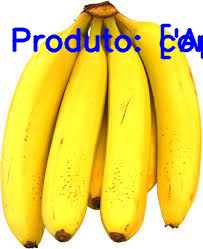

In [77]:
# Exibindo a imagem com a previsão da classe
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(image, f'Produto: {predicted_class}', (10, 50), font, 1, (255, 0, 0), 2, cv2.LINE_AA)
cv2_imshow(image)